### 鸢尾花数据集的降维分析

In [1]:
#先导入包（鸢尾花数据集在sklearn.datasets里面）
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


fit_transform(X) 
计算数据的均值和方差，并给予计算出来的均值和方差来转换数据，从而把数据转换成标准的正态分布

In [2]:
#导入数据，并把它进行归一化
iris = load_iris()
X = iris.data       #X.shape = (150, 4)

#X的归一化 x= (x-u)/sigma
X_norm = StandardScaler().fit_transform(X) 
X_norm.mean(axis=0)     #每一维均值为0 ,方差std为1

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [3]:
def featureNormalizse(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x-mean)/std, mean, std
x_norm, means, stds = featureNormalizse(X)
x_norm.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

函数：numpy.linalg.eig(a)

参数:a：想要计算奇异值和右奇异值的方阵。  
返回值：w：特征值。每个特征值根据它的多重性重复。这个数组将是复杂类型，除非虚数部分为0。当传进的参数a是实数时，得到的特征值是实数。v：特征向量。

In [4]:
#用PCA降维过程
#求特征值和特征向量
ew, ev = np.linalg.eig(np.cov(X_norm.T))    #np.cov直接求协方差矩阵，每一行代表一个特征

# 特征向量特征值的排序
#argsort函数返回书组织从小到大的索引值，array[::-1]倒序输出，即从大到小输出索引值
ew_order = np.argsort(ew)[::-1] 
ew_sort = ew[ew_order]   # ew_order--->[0 1 2 3]
ev_sort = ev[:, ew_order]
ev_sort.shape

(4, 4)

In [5]:
#指定k，此处k=2,取出排序后的特征向量的前两列就是基
K = 2
V = ev_sort[:, :2]   #最大的k个值对应的特征向量

#最后，得到降维后的数据
X_new = X_norm.dot(V)

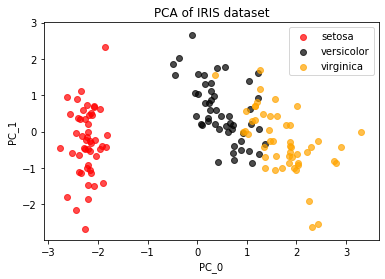

In [6]:
#可视化一下X_new
clors = ['red','black','orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_new[iris.target ==i,0],
                X_new[iris.target==i, 1],
                alpha=0.7,
                c=clors[i],
                label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.show()